# Microsoft Capstone Project
### Mari Bisnis Dataset
### Subtheme: **Business** 


By: Zhafira E. Fawnia - DAI007 - Data & AI 

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/My Drive/MariBisnis/MariBisnis.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- Id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors




In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.shape

(21613, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Only one categorical variable (object type) which is the date column. 
The rest are numerical, this is sufficient for predictions using machine learning algorithms. But first, we must do feature engineering on these columns. 

In [8]:
numerical = ['id', 'price','bedrooms',  'bathrooms',  'sqft_living','sqft_lot',
           'floors', 'waterfront','view', 'condition',  'grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
# Since only categorical = ['date'], we will just omit the date feature column as it holds no significance in prediction goals.

In [9]:
df_original = df
df = df[numerical]

## Outlier Detection

In [10]:
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.preprocessing import QuantileTransformer
import scipy.stats as stats
from sklearn.cluster import DBSCAN

In [11]:
# Detecting outliers of price with Z-Score
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(df_original['price'])

Outliers: [2000000.0, 2250000.0, 2400000.0, 2900000.0, 2050000.0, 3075000.0, 2384000.0, 2250000.0, 2125000.0, 1950000.0, 3070000.0, 2250000.0, 2400000.0, 2450000.0, 1955000.0, 1750000.0, 5110800.0, 1875000.0, 2300000.0, 2260000.0, 5300000.0, 2200000.0, 1700000.0, 2537000.0, 5350000.0, 2250000.0, 1679000.0, 1928000.0, 2350000.0, 1715000.0, 2400000.0, 2532000.0, 3850000.0, 1735000.0, 1700000.0, 1650000.0, 1680000.0, 1760000.0, 2750000.0, 1810000.0, 3278000.0, 1700000.0, 1865000.0, 1650000.0, 4500000.0, 1835000.0, 3600000.0, 3000000.0, 2950000.0, 2525000.0, 1799000.0, 2298000.0, 2288000.0, 1899000.0, 1901000.0, 1900000.0, 1965000.0, 1675000.0, 2075000.0, 2544750.0, 2095000.0, 2453500.0, 2450000.0, 1905000.0, 1740000.0, 1650000.0, 2890000.0, 2200000.0, 2950000.0, 7062500.0, 2400000.0, 2500000.0, 2150000.0, 4000000.0, 2880500.0, 1875000.0, 2400000.0, 2125000.0, 2050000.0, 1705000.0, 5570000.0, 1670000.0, 2000000.0, 2485000.0, 1850000.0, 2479000.0, 2048000.0, 1895000.0, 1940000.0, 1740000.0,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


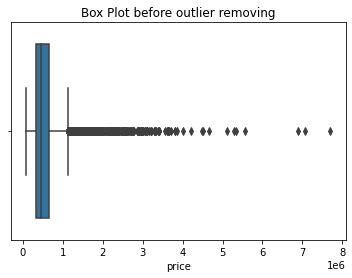

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


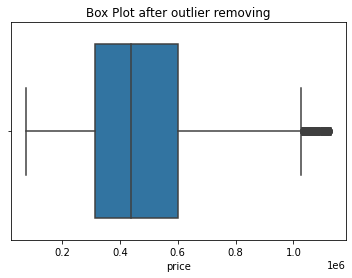

In [12]:
sns.boxplot(df['price'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'price')
sns.boxplot(df['price'])
plt.title("Box Plot after outlier removing")
plt.show()

In [13]:
df.shape # After removing

(20467, 20)

In [14]:
df_original.shape # Before removing

(21613, 21)

## Feature Analysis & Engineering

In [15]:
features = df.columns
traindf = df.dropna()

In [16]:
traindf = pd.DataFrame(traindf,columns=features)

In [17]:
traindf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


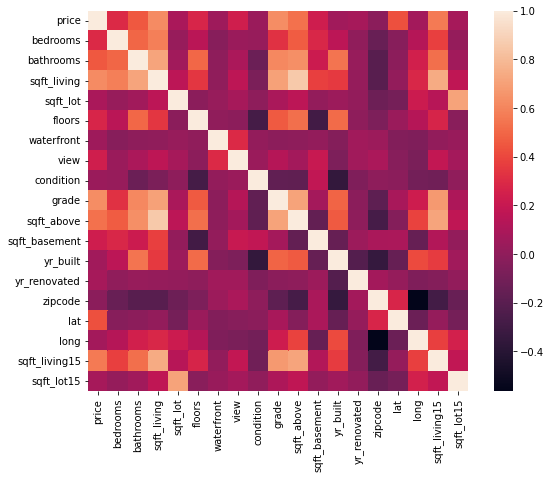

In [18]:
plt.subplots(figsize=(9,7))
corr=traindf.drop(['id'],1).corr()
sns.heatmap(corr,square=True)

In [19]:
# Okay, let's assume a good house would have a price of >200000
y = traindf['price']>=200000
X = traindf.copy()
del X['price']

In [20]:
X.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
len(X.columns)

19

In [22]:
feature_name = list(X.columns)
# no of maximum features I need to select 
num_feats=10 # So from 19 -> 10 only

In [23]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

# Pearson Correlation:
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [24]:
# Chi Squared:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [25]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
rfe_selector.fit(X_norm, y)

Fitting estimator with 19 features.


RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)

In [26]:
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

10 selected features


In [27]:
# Embedded Method
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

10 selected features


In [28]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

10 selected features


In [29]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Random Forest,Total
1,sqft_living15,True,True,True,True,4
2,sqft_living,True,True,True,True,4
3,sqft_above,True,True,True,True,4
4,lat,True,True,True,True,4
5,yr_built,True,True,False,True,3
6,sqft_basement,True,True,True,False,3
7,grade,True,True,True,False,3
8,floors,True,True,True,False,3
9,bathrooms,True,True,True,False,3
10,view,False,True,True,False,2


So we will be taking these features for regression ML models:

In [30]:
features_selected = ['sqft_living15','sqft_living','sqft_above','lat','grade','sqft_basement','bathrooms','view','floors','bedrooms']

In [31]:
print("The distinct values of grade: ", df['grade'].unique())
print("The distinct values of view: ", df['view'].unique())

The distinct values of grade:  [ 7  6  8  9  5 10 11  4 12  3  1]
The distinct values of view:  [0 3 4 2 1]


## Linear Regression 

In [32]:
X = df[features_selected]
y = df['price']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [36]:
# Importing Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [37]:
# print the intercept
print(lin_reg.intercept_)

478506.8028060853


In [38]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living15,22489.659237
sqft_living,37712.414925
sqft_above,27826.609413
lat,83208.087460
grade,62296.096415
sqft_basement,21914.845229
bathrooms,-3904.734845
view,27209.327686
floors,2100.263567
bedrooms,-5163.418336


In [39]:
pred = lin_reg.predict(X_test)

In [40]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 93100.38426113466
MSE: 15415048335.497396
RMSE: 124157.35312697914
R2 Square 0.6342048065788062
__________________________________
Train set evaluation:
_____________________________________
MAE: 94088.13132198396
MSE: 15535427169.486328
RMSE: 124641.19371013071
R2 Square 0.6465638012428226
__________________________________


In [41]:
comparison_linreg = y_test.to_frame()
comparison_linreg.columns = ['Actual value']
comparison_linreg['Predicted value'] = test_pred
comparison_linreg.head(10)

,Actual value,Predicted value
16607,420000.0,653495.587574
15557,230000.0,208534.287497
1285,270000.0,322862.900359
5964,807000.0,592691.668321
7051,225000.0,252148.344770
4322,410000.0,531309.145126
12742,135000.0,190677.344313
10100,550000.0,536441.915446
9222,289000.0,308553.589872
12925,575000.0,491083.358442


In [42]:
# Making a combined df for all the results

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,93100.384261,1.541505e+10,124157.353127,0.634205,0.640626


## Random Forest Regression

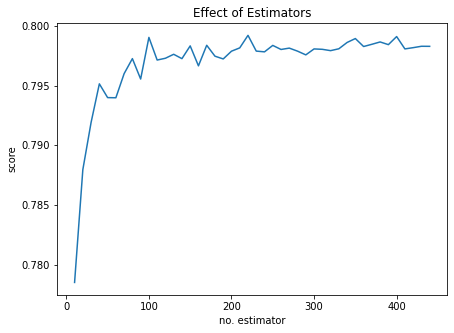

In [43]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
model = RandomForestRegressor(n_jobs=-1)

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 450, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))

In [44]:
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))


model = RandomForestRegressor(n_estimators=200, 
                               bootstrap = True)
# Fit on training data
model.fit(X_train, y_train)

# Actual class predictions
rf_predictions = model.predict(X_test)

comparison_fy21= y_test.to_frame()
comparison_fy21.columns = ['Actual Price']
comparison_fy21['Predicted Price'] = rf_predictions
comparison_fy21.head(10)


,Actual Price,Predicted Price
16607,420000.0,529151.000000
15557,230000.0,239753.500000
1285,270000.0,269924.581429
5964,807000.0,772818.597500
7051,225000.0,249009.250000
4322,410000.0,391063.750000
12742,135000.0,216743.655000
10100,550000.0,602062.560000
9222,289000.0,330614.000000
12925,575000.0,578317.145000


In [45]:
train_predictions = model.predict(X_train)

In [46]:
# Print RF evaluations: 
print_evaluate(y_test, predictions)

MAE: 65236.360948485904
MSE: 8500775718.880493
RMSE: 92199.65140324822
R2 Square 0.7982787448575495
__________________________________


In [47]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, predictions) # x test
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_predictions) # x train

Test set evaluation:
_____________________________________
MAE: 65236.360948485904
MSE: 8500775718.880493
RMSE: 92199.65140324822
R2 Square 0.7982787448575495
__________________________________
Train set evaluation:
_____________________________________
MAE: 24602.812516245882
MSE: 1251107942.1368933
RMSE: 35371.00425683293
R2 Square 0.9715368730785663
__________________________________


In [48]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, predictions), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,93100.384261,1.541505e+10,124157.353127,0.634205,0.640626
1,Random Forest Regressor,65236.360948,8.500776e+09,92199.651403,0.798279,0.000000


## Robust Regression

Robust regression is a form of regression analysis designed to overcome some limitations of traditional parametric and non-parametric methods. Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process.

One instance in which robust estimation should be considered is when there is a strong suspicion of heteroscedasticity.

A common situation in which robust estimation is used occurs when the data contain outliers. In the presence of outliers that do not come from the same data-generating process as the rest of the data, least squares estimation is inefficient and can be biased. Because the least squares predictions are dragged towards the outliers, and because the variance of the estimates is artificially inflated, the result is that outliers can be masked. (In many situations, including some areas of geostatistics and medical statistics, it is precisely the outliers that are of interest.)

### Using RANSAC:
Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model. The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

In [49]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAE: 101740.43529127826
MSE: 18334693128.912533
RMSE: 135405.66136211785
R2 Square 0.5649223749779188
__________________________________
Train set evaluation:
_____________________________________
MAE: 102385.41724872409
MSE: 18545756301.458145
RMSE: 136182.8047201927
R2 Square 0.5780777999372472
__________________________________


To conclude, if we excluded feature engineering with RANSAC and Robust Linear Regression, it takes approximately 1000 trials to get to R squared of 54%, whereas with feature engineering it only took us 100 trials.


In [50]:
comparison_robust_regression= y_test.to_frame()
comparison_robust_regression.columns = ['Actual Price']
comparison_robust_regression['Predicted Price'] = test_pred
comparison_robust_regression.head(10)

,Actual Price,Predicted Price
16607,420000.0,741424.153082
15557,230000.0,182681.049508
1285,270000.0,373851.549508
5964,807000.0,507542.532971
7051,225000.0,228775.549508
4322,410000.0,483940.334758
12742,135000.0,156624.299508
10100,550000.0,522456.747721
9222,289000.0,320814.334758
12925,575000.0,488100.834758


In [51]:
results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,93100.384261,1.541505e+10,124157.353127,0.634205,0.640626
1,Random Forest Regressor,65236.360948,8.500776e+09,92199.651403,0.798279,0.000000
2,Robust Regression,101740.435291,1.833469e+10,135405.661362,0.564922,0.541179


## Stochastic Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.



In [52]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=300, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 93100.33443454599
MSE: 15415046488.564064
RMSE: 124157.34568910558
R2 Square 0.6342048504060664
__________________________________
Train set evaluation:
_____________________________________
MAE: 94088.09919086861
MSE: 15535427175.331451
RMSE: 124641.19373357852
R2 Square 0.646563801109844
__________________________________


In [53]:
comparison_stochastic= y_test.to_frame()
comparison_stochastic.columns = ['Actual Price']
comparison_stochastic['Predicted Price'] = test_pred
comparison_stochastic.head(10)

,Actual Price,Predicted Price
16607,420000.0,653496.371219
15557,230000.0,208536.541680
1285,270000.0,322864.605461
5964,807000.0,592689.185999
7051,225000.0,252149.145035
4322,410000.0,531307.041451
12742,135000.0,190680.246505
10100,550000.0,536443.485331
9222,289000.0,308551.837058
12925,575000.0,491080.888987


In [54]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,93100.384261,1.541505e+10,124157.353127,0.634205,0.640626
1,Random Forest Regressor,65236.360948,8.500776e+09,92199.651403,0.798279,0.000000
2,Robust Regression,101740.435291,1.833469e+10,135405.661362,0.564922,0.541179
3,Stochastic Gradient Descent,93100.334435,1.541505e+10,124157.345689,0.634205,0.000000


## Elastic Net Regression
A linear regression model trained with L1 and L2 prior as regularizer.

This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

In [55]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 93143.70011819595
MSE: 15415246585.739016
RMSE: 124158.15150741821
R2 Square 0.6342001021507757
__________________________________
Train set evaluation:
_____________________________________
MAE: 94138.16662809119
MSE: 15536829241.321615
RMSE: 124646.818015229
R2 Square 0.6465319036365037
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.372e+11, tolerance: 6.297e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [56]:
comparison_stochastic= y_test.to_frame()
comparison_stochastic.columns = ['Actual Price']
comparison_stochastic['Predicted Price'] = test_pred
comparison_stochastic.head(10)

,Actual Price,Predicted Price
16607,420000.0,653094.039095
15557,230000.0,209349.138613
1285,270000.0,323467.295117
5964,807000.0,591085.018989
7051,225000.0,253669.382961
4322,410000.0,530473.429215
12742,135000.0,192003.925217
10100,550000.0,535035.414700
9222,289000.0,310922.601396
12925,575000.0,491505.064171


In [57]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,93100.384261,1.541505e+10,124157.353127,0.634205,0.640626
1,Random Forest Regressor,65236.360948,8.500776e+09,92199.651403,0.798279,0.000000
2,Robust Regression,101740.435291,1.833469e+10,135405.661362,0.564922,0.541179
3,Stochastic Gradient Descent,93100.334435,1.541505e+10,124157.345689,0.634205,0.000000
4,Elastic Net Regression,93143.700118,1.541525e+10,124158.151507,0.634200,0.000000


## Artificial Neural Network
Due to the low R squared values from the regressions, we will try using Artificial Neural Network approaches in hopes of increasing its accuracy parameter.

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
14326/14326 [==============================] - 39s 3ms/step - loss: 270321991680.0000 - val_loss: 252546727936.0000
Epoch 2/100
14326/14326 [==============================] - 39s 3ms/step - loss: 181579005952.0000 - val_loss: 63668543488.0000
Epoch 3/100
14326/14326 [==============================] - 38s 3ms/step - loss: 37629505536.0000 - val_loss: 33862787072.0000
Epoch 4/100
14326/14326 [==============================] - 39s 3ms/step - loss: 31403929600.0000 - val_loss: 31133843456.0000
Epoch 5/100
14326/14326 [==============================] - 39s 3ms/step - loss: 29079986176.0000 - val_loss: 28863307776.0000
Epoch 6/100
14326/14326 [==============================] - 34s 2ms/step - loss: 27237251072.0000 - val_loss: 27040190464.0000
Epoch 7/100
14326/14326 [==============================] - 34s 2ms/step - loss: 25672257536.0000 - val_loss: 25490880512.0000
Epoch 8/100
14326/14326 [==============================] - 39s 3ms/step - loss: 24433666048.0000 - val_loss: 242344

In [59]:
loss_df = pd.DataFrame(r.history)

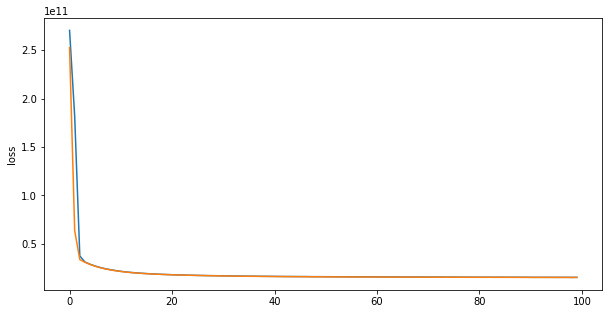

In [60]:
plt.figure(figsize=(10,5))
sns.lineplot(data = loss_df["loss"])
sns.lineplot(data = loss_df["val_loss"])

In [61]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 92298.55380587446
MSE: 15463426214.714628
RMSE: 124352.0253743968
R2 Square 0.6330568117557978
__________________________________
Train set evaluation:
_____________________________________
MAE: 92675.13990079226
MSE: 15404568117.009432
RMSE: 124115.14056314577
R2 Square 0.6495408887458455
__________________________________


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


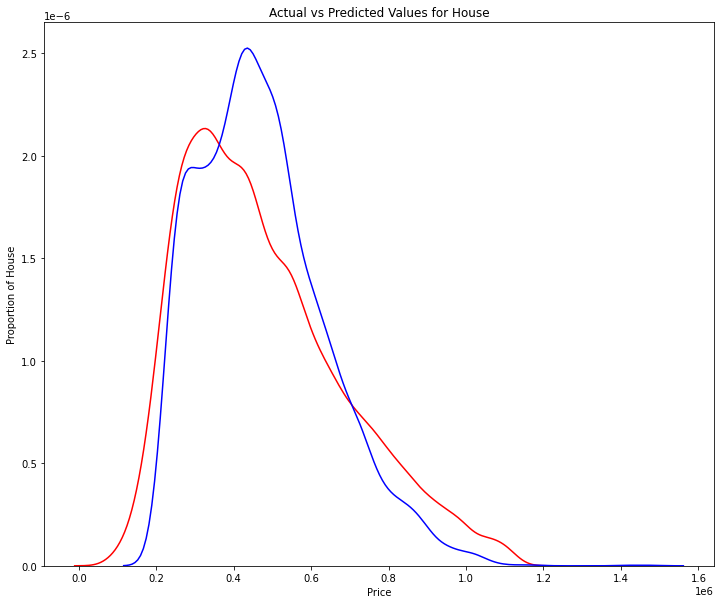

In [62]:
plt.figure(figsize=(12, 10))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value") # hist=True
sns.distplot(test_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Values for House')
plt.xlabel('Price')
plt.ylabel('Proportion of House')

plt.show()
plt.close()

In [63]:
results_df_2 = pd.DataFrame(data=[["Artficial Neural Network", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,93100.384261,1.541505e+10,124157.353127,0.634205,0.640626
1,Random Forest Regressor,65236.360948,8.500776e+09,92199.651403,0.798279,0.000000
2,Robust Regression,101740.435291,1.833469e+10,135405.661362,0.564922,0.541179
3,Stochastic Gradient Descent,93100.334435,1.541505e+10,124157.345689,0.634205,0.000000
4,Elastic Net Regression,93143.700118,1.541525e+10,124158.151507,0.634200,0.000000
5,Artficial Neural Network,92298.553806,1.546343e+10,124352.025374,0.633057,0.000000


In [64]:
# Convert the results_df to an excel
results_df.to_excel("results_df_regression.xlsx")
